# Bairros de João Pessoa

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

### Lendo de geodata-jp

In [3]:
bairros = gpd.read_file('https://raw.githubusercontent.com/paulovitorweb/geodata-jp/main/data/bairros.geojson')

In [4]:
bairros.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   cod        64 non-null     object  
 1   nome       64 non-null     object  
 2   perimetro  64 non-null     float64 
 3   area       64 non-null     float64 
 4   hectares   64 non-null     float64 
 5   densidade  9 non-null      object  
 6   geometry   64 non-null     geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 3.6+ KB


In [5]:
bairros.head()

,cod,nome,perimetro,area,hectares,densidade,geometry
0,24,ERNESTO GEISEL,6650.895993,1.905707e+06,190.570736,None,"POLYGON ((-34.86412 -7.17066, -34.86447 -7.170..."
1,11,BESSA,6362.909869,2.040910e+06,204.091004,"0,000000000","POLYGON ((-34.84627 -7.07684, -34.84493 -7.076..."
2,02,AEROCLUBE,6436.704571,2.058472e+06,205.847186,"0,000000000","POLYGON ((-34.84435 -7.09790, -34.84342 -7.097..."
3,35,JARDIM OCEANIA,7344.368535,2.280272e+06,228.027235,"0,000000000","POLYGON ((-34.83775 -7.09747, -34.83331 -7.097..."
4,38,MANAÍRA,6610.028055,2.299794e+06,229.979426,"0,000000000","POLYGON ((-34.83043 -7.11329, -34.82384 -7.110..."


### Excluindo alguns campos

In [6]:
bairros = bairros.drop(columns=['perimetro', 'area', 'hectares', 'densidade'])
bairros.head()

,cod,nome,geometry
0,24,ERNESTO GEISEL,"POLYGON ((-34.86412 -7.17066, -34.86447 -7.170..."
1,11,BESSA,"POLYGON ((-34.84627 -7.07684, -34.84493 -7.076..."
2,02,AEROCLUBE,"POLYGON ((-34.84435 -7.09790, -34.84342 -7.097..."
3,35,JARDIM OCEANIA,"POLYGON ((-34.83775 -7.09747, -34.83331 -7.097..."
4,38,MANAÍRA,"POLYGON ((-34.83043 -7.11329, -34.82384 -7.110..."


### Transformando para coordenadas métricas

In [7]:
bairros = bairros.to_crs('EPSG:31985')
bairros.crs

<Projected CRS: EPSG:31985>
Name: SIRGAS 2000 / UTM zone 25S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 36°W and 30°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-36.0, -23.8, -29.99, 4.19)
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Calculando área dos bairros

In [8]:
bairros['area_km2'] = bairros['geometry'].area / 1000000
bairros.head()

,cod,nome,geometry,area_km2
0,24,ERNESTO GEISEL,"POLYGON ((294146.208 9206966.635, 294107.367 9...",1.905748
1,11,BESSA,"POLYGON ((296077.112 9217351.507, 296224.360 9...",2.040906
2,02,AEROCLUBE,"POLYGON ((296297.729 9215023.713, 296400.444 9...",2.059346
3,35,JARDIM OCEANIA,"POLYGON ((297027.067 9215073.395, 297518.007 9...",2.278178
4,38,MANAÍRA,"POLYGON ((297843.051 9213327.092, 298569.251 9...",2.302670


### Plotando gráficos

<AxesSubplot:ylabel='nome'>

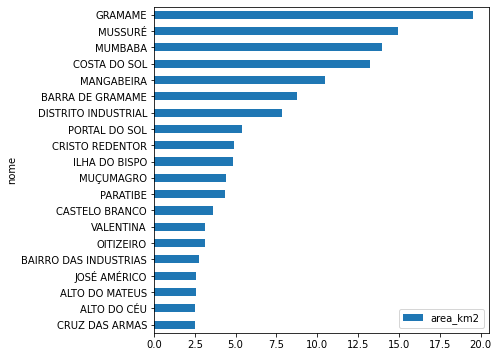

In [9]:
bairros.sort_values(by='area_km2')[-20:].plot.barh(x='nome', y='area_km2', figsize=(6,6))

### Plotando mapas

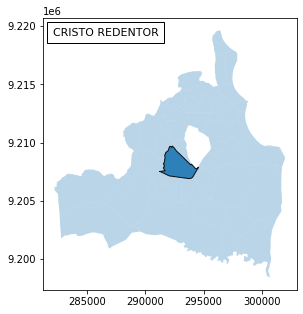

In [10]:
def _insert_title(title, ax):
    at = AnchoredText(title, prop={'size':11}, frameon=True, loc='upper left')
    at.patch.set_boxstyle('square,pad=0.1')
    ax.add_artist(at)

def plot(bairro_nome):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    _insert_title(bairro_nome, ax)
    bairros.plot(ax=ax, alpha=0.3, zorder=1)
    bairros[bairros['nome'] == bairro_nome].plot(ax=ax, alpha=0.9, edgecolor='k', zorder=2)

plot('CRISTO REDENTOR')

### Adicionando anotação ao mapa

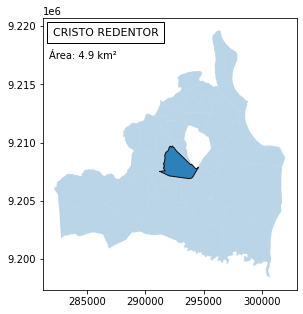

In [11]:
def _insert_data(data, ax):
    x, y, arrow_length = 0.025, 0.89, 0.03
    ax.annotate(data, xy=(x, y), xytext=(x, y-arrow_length),
                ha='left', va='center', fontsize=10,
                xycoords=ax.transAxes)

def plot(bairro_nome):
    mask = bairros['nome'] == bairro_nome
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    _insert_title(bairro_nome, ax)
    bairro = bairros[mask]
    area = round(float(bairro.iloc[0]['area_km2']), 1)
    data = 'Área: ' + str(area) + ' km²'
    _insert_data(data, ax)
    bairros.plot(ax=ax, alpha=0.3, zorder=1)
    bairro.plot(ax=ax, alpha=0.9, edgecolor='k', zorder=2)

plot('CRISTO REDENTOR')

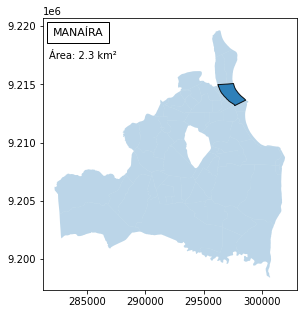

In [12]:
plot('MANAÍRA')

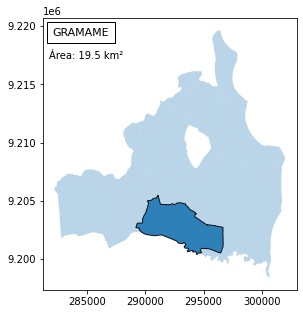

In [13]:
plot('GRAMAME')

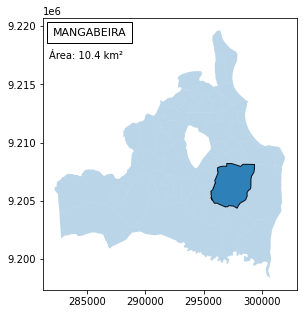

In [14]:
plot('MANGABEIRA')